## TOUALBI Ali
### alitoualbi@gmail.com

#Part II

In [ ]:
import os
from google.colab import drive
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd


In [ ]:
drive.mount("/content/drive", force_remount=True)
drive_dir = "/content/drive/MyDrive/Groover/part_2_raw_audio/"

Mounted at /content/drive


##Playing and load a music

In [ ]:
audio_path = drive_dir+"music0.wav"
ipd.Audio(audio_path)

*load a music and decode it into a 1-dimensional array(a time serie) represented with 'x', 'sr' represent the sampling rate*

In [ ]:
x,sr= librosa.load(audio_path)
print(type(x),type(sr))

<class 'numpy.ndarray'> <class 'int'>


##Display the audio file


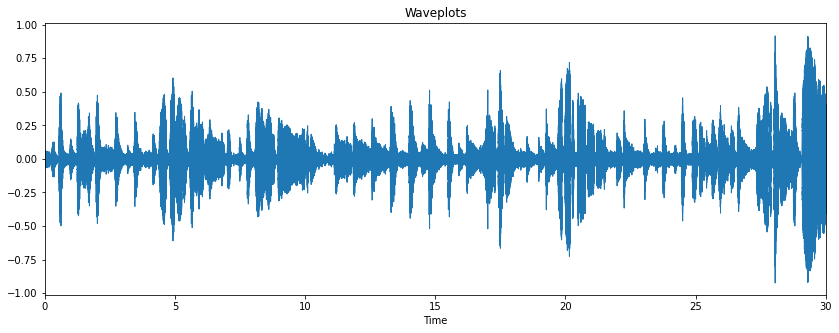

In [ ]:
plt.figure(figsize=(14, 5))
plt.title('Waveplots')
librosa.display.waveplot(x, sr=sr)

###Display the Spectrogram

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Text(0.5, 1.0, 'Log-frequency power spectrogram')

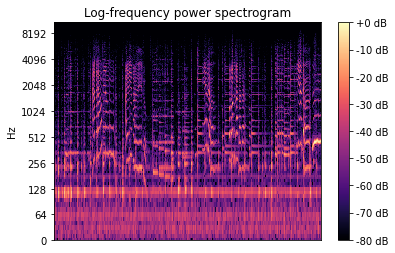

In [ ]:
D = librosa.amplitude_to_db(librosa.stft(x), ref=np.max)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

##Features Extraction




###chroma_stft
*a feature that capture harmonic and melodic characteristics of music.*

[Text(0.5, 1.0, 'Chromagram')]

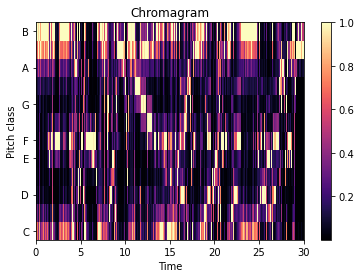

In [ ]:
chroma_stft=librosa.feature.chroma_stft(y=x, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')


In [ ]:
mean_chroma_stft=np.mean(chroma_stft)
var_chroma_stft=np.var(chroma_stft)
print(mean_chroma_stft,var_chroma_stft)

0.27837843 0.09501467


###RMS
*Root Mean Square is a time analysis feature that measures the power content in the vibration signature.*

[Text(0.5, 1.0, 'log Power spectrogram')]

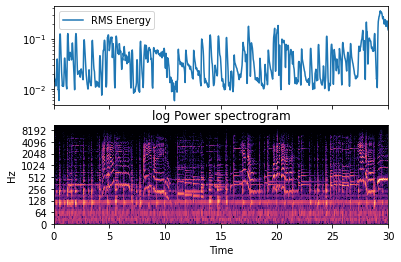

In [ ]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [ ]:
mean_rms=np.mean(rms)
var_rms=np.var(rms)
print(mean_rms,var_rms)

0.04613271549383371 0.002331123008167562


###Spectral centroid
*It indicates where the center of mass of the spectrum is located.*

[Text(0.5, 1.0, 'log Power spectrogram')]

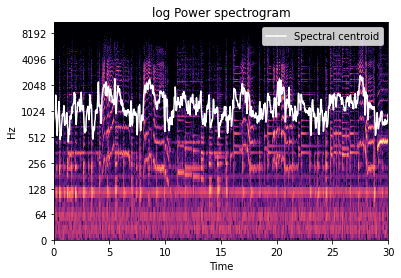

In [ ]:
cent = librosa.feature.spectral_centroid(y=x, sr=sr)
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [ ]:
mean_cent=np.mean(cent)
var_cent=np.var(cent)
print(mean_cent,var_cent)

1198.4590845429227 161879.8639998424


###Spectral bandwidth
*it is defined as the band width of light at one-half the peak maximum.*

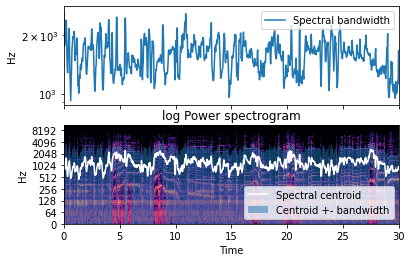

In [ ]:
spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

In [ ]:
mean_spec_bw =np.mean(spec_bw)
var_spec_bw =np.var(spec_bw )
print(mean_spec_bw ,var_spec_bw)

1573.5002754703671 84832.42179441989


###Rolloff
*it can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off).*

[Text(0.5, 1.0, 'log Power spectrogram')]

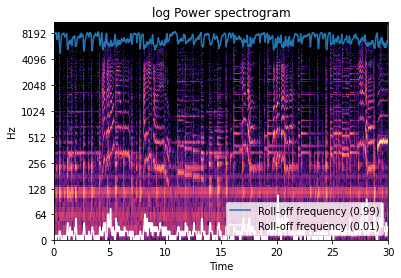

In [ ]:
rlf=librosa.feature.spectral_rolloff(y=x, sr=sr)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.01)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [ ]:
mean_rlf =np.mean(rlf)
var_rlf =np.var(rlf)
print(mean_rlf ,var_rlf)

2477.275945747535 994270.4002301504


###Zero crossing rate
*it is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.*

In [ ]:
zero_crossing_rate=librosa.feature.zero_crossing_rate(x)
mean_zero_crossing_rate =np.mean(zero_crossing_rate)
var_zero_crossing_rate =np.var(zero_crossing_rate)
print(mean_zero_crossing_rate ,var_zero_crossing_rate)

0.05197268646075019 0.001486869460338792


###Harmony
*is an integral (whole number) multiple of the frequency of the same reference signal or wave*

In [ ]:
harmonic = librosa.effects.harmonic(x, margin=3.0)
mean_harmonic =np.mean(harmonic)
var_harmonic =np.var(harmonic)
print(mean_harmonic ,var_harmonic)

-5.5896835e-06 0.0067353514


###Tempo
*represent* beats per minute

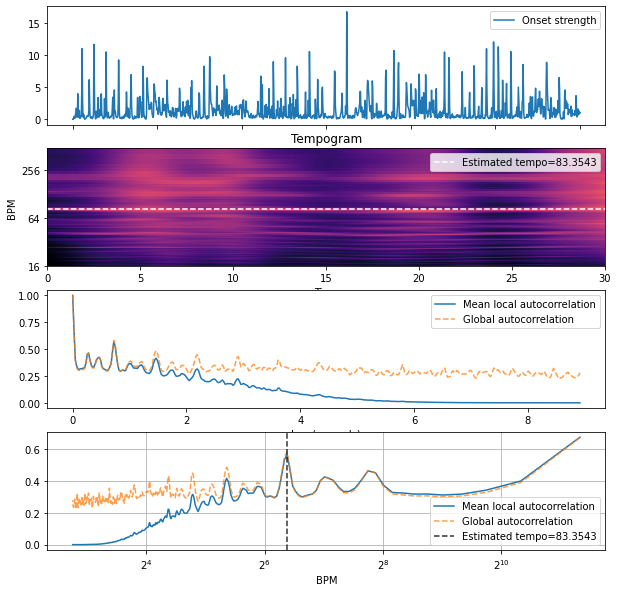

In [ ]:
# Compute local onset autocorrelation
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

#Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)

# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)


In [ ]:
print(tempo)

83.35433467741936


### MFCC
*the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. *

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=384
  n_fft, y.shape[-1]


[Text(0.5, 1.0, 'MFCC')]

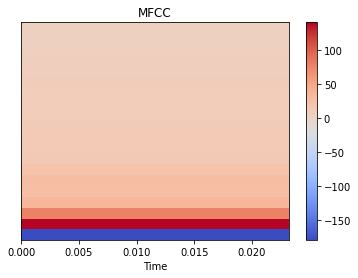

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')


In [ ]:
mean_mfccs=np.mean(mfccs)
var_mfccs=np.var(mfccs)
print(mean_mfccs,var_mfccs)


14.64570674826192 2941.4216058916763


#PART III

##UPLOAD THE DATA

In [ ]:
drive_dir = "/content/drive/MyDrive/Groover/"

In [ ]:
data=pd.read_csv(drive_dir+'part3_GrooverChallengeDataset.csv')  
data.describe

<bound method NDFrame.describe of      length  chroma_stft_mean  chroma_stft_var  ...  mfcc20_mean  mfcc20_var  label
0    661794          0.350088         0.088757  ...     1.221291   46.936035  blues
1    661794          0.340914         0.094980  ...     0.531217   45.786282  blues
2    661794          0.363637         0.085275  ...    -2.231258   30.573025  blues
3    661794          0.404785         0.093999  ...    -3.407448   31.949339  blues
4    661794          0.308526         0.087841  ...   -11.703234   55.195160  blues
..      ...               ...              ...  ...          ...         ...    ...
995  661794          0.352063         0.080487  ...    -1.193787   49.950665   rock
996  661794          0.398687         0.075086  ...    -2.795338   31.773624   rock
997  661794          0.432142         0.075268  ...    -2.106337   29.865515   rock
998  661794          0.362485         0.091506  ...    -3.590644   41.299088   rock
999  661794          0.358401         0.08

##DATA ANALYS

### Confusion Matrix

*Display the confusion matrix and the distrubtion of classes to understand the data, and see if there is some features that we can delete or we need to balance our distrubtion *

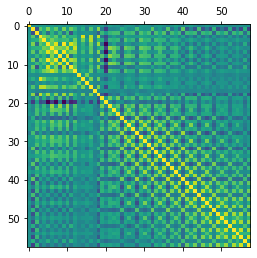

In [ ]:
corr = data.corr()
plt.matshow(corr)
plt.savefig('corr.pdf')

In [ ]:
data.label.value_counts()

country      100
rock         100
hiphop       100
reggae       100
metal        100
blues        100
jazz         100
classical    100
disco        100
pop          100
Name: label, dtype: int64

##DATA SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X=data.drop(columns=['label'])
Y=data['label']
X.describe

<bound method NDFrame.describe of      length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var
0    661794          0.350088  ...     1.221291   46.936035
1    661794          0.340914  ...     0.531217   45.786282
2    661794          0.363637  ...    -2.231258   30.573025
3    661794          0.404785  ...    -3.407448   31.949339
4    661794          0.308526  ...   -11.703234   55.195160
..      ...               ...  ...          ...         ...
995  661794          0.352063  ...    -1.193787   49.950665
996  661794          0.398687  ...    -2.795338   31.773624
997  661794          0.432142  ...    -2.106337   29.865515
998  661794          0.362485  ...    -3.590644   41.299088
999  661794          0.358401  ...     1.155239   49.662510

[1000 rows x 58 columns]>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 58), (200, 58), (800,), (200,))

*Here, I created a method to train and test our model*

In [ ]:
def evaluate_method(model, X_train, X_test, y_train, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    return acc_train, acc_test, np.mean(scores), np.std(scores)

## MODELS

i choose to implement **SVM, KNN, Random Forests, GrandientBoosting Classifier and Neural Network,** by using sklearn and Pytorch.
models are evaluated by using **accuracy**.

###SVM
after a Grid search the best params are **C=0.9 and Kernel ='rbf**, 

In [ ]:
from sklearn.metrics import roc_auc_score
clf_svm =  make_pipeline(StandardScaler(), SVC(C=0.9,kernel='rbf',gamma='auto',probability=True))
acc_train,acc_test,acc_mean,acc_std=evaluate_method(clf_svm, X_train, X_test, y_train, y_test)
roc_score=roc_auc_score(y_test, clf_svm.predict_proba(X_test), multi_class='ovr')


In [ ]:
print("accuracy train: ",acc_train)
print("accuracy test: ",acc_test)
print("accuracy mean: ",acc_mean)
print("accuracy std: ",acc_std)
print("roc score: ",roc_score)

accuracy train:  0.87875
accuracy test:  0.74
accuracy mean:  0.7225
accuracy std:  0.02325134404717284
roc score:  0.9617864596968637


### KNN
after a Grid search the best params are **n_neighbors=4**, 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay

In [ ]:
clf_knn=  make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4))
acc_train,acc_test,acc_mean,acc_std=evaluate_method(clf_knn, X_train, X_test, y_train, y_test)
roc_score=roc_auc_score(y_test, clf_knn.predict_proba(X_test), multi_class='ovr')


In [ ]:
print("accuracy train: ",acc_train)
print("accuracy test: ",acc_test)
print("accuracy mean: ",acc_mean)
print("accuracy std: ",acc_std)
print("ROC AUC: ",roc_score)

accuracy train:  0.81
accuracy test:  0.69
accuracy mean:  0.66625
accuracy std:  0.044476117186642995
ROC AUC:  0.8951362847833473


### Random Forests 
after a Grid search the best params are **max_depth=5**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forests=  make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=5, random_state=0))
acc_train,acc_test,acc_mean,acc_std=evaluate_method(clf_random_forests, X_train, X_test, y_train, y_test)
roc_score=roc_auc_score(y_test, clf_random_forests.predict_proba(X_test), multi_class='ovr')

In [ ]:
print("accuracy train: ",acc_train)
print("accuracy test: ",acc_test)
print("accuracy mean: ",acc_mean)
print("accuracy std: ",acc_std)
print("ROC AUC: ",roc_score)

accuracy train:  0.88125
accuracy test:  0.655
accuracy mean:  0.70625
accuracy std:  0.05273755777432248
ROC AUC:  0.9468430722228076


### GradientBoostingClassifier
after a Grid search the best params are **n_estimators=20, learning_rate=0.01,
      max_depth=10**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient = make_pipeline(StandardScaler(),GradientBoostingClassifier(n_estimators=20, learning_rate=0.01,
      max_depth=10, random_state=0))
acc_train,acc_test,acc_mean,acc_std=evaluate_method(clf_gradient, X_train, X_test, y_train, y_test)
roc_score=roc_auc_score(y_test, clf_gradient.predict_proba(X_test), multi_class='ovr')

In [ ]:
print("accuracy train: ",acc_train)
print("accuracy test: ",acc_test)
print("accuracy mean: ",acc_mean)
print("accuracy std: ",acc_std)
print("ROC AUC: ",roc_score)

accuracy train:  1.0
accuracy test:  0.53
accuracy mean:  0.5325
accuracy std:  0.04019483797703381
ROC AUC:  0.855176209437183


###NEURAL NETWORK

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.utils.data as data_utils
from tqdm.autonotebook import tqdm
import torch.nn.functional as F
import torchvision.transforms
from sklearn import preprocessing

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

####DATASET
*here i create a custom data set to load the csv file and split it with a ratio of 80\% for train and 20\% for test,
i also convert labels to integer*

In [ ]:
class MyDataset(Dataset):
	def __init__( self ,x,y): 
		self.x=x
		self.y=y
	def __getitem__( self ,index ):
		return (self.x[index]),self.y[index]
	def __len__(self):
		return self.x.shape[0]

In [ ]:
X=data.drop(columns=['label'])
Y=data['label']
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y=pd.factorize(Y)[0] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train=torch.tensor(y_train.astype(np.long))
y_test=torch.tensor(y_test.astype(np.long))

X_train=torch.tensor(X_train.astype(np.float32),requires_grad=True)
X_test=torch.tensor(X_test.astype(np.float32),requires_grad=True)


####DATA LOADER

In [ ]:
batch_size=20
trainloader = DataLoader(MyDataset(X_train,y_train) , batch_size=batch_size)
testloader = DataLoader(MyDataset(X_test,y_test) , batch_size=batch_size)

#### THE NETWORK

 

*   it contain 3 **linear layer of size (58)**, after each layer a **sigmoid activation** and the output of each layer is added to the previous one, i used also **batchNormalization(58)** and a **dropout layer** with a prob of 0.5
*  to optimize the model i use **Adam** with a **learning rate of 1e-4 **

*   the loss used **is the cross Entropy Loss** 
*   the model is evaluated with **Accuracy ** and trainde for 3000 epochs




In [ ]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1=torch.nn.Linear(58,58)
    self.fc2=torch.nn.Linear(58,58)
    self.fc3=torch.nn.Linear(58,58)
    self.fc4=torch.nn.Linear(58,10)
    self.sig=torch.nn.Sigmoid()
  def forward(self, x):	
    x =x+self.sig(self.fc1(x))
    torch.nn.BatchNorm1d(58),
    
    x =x+self.sig(self.fc2(x))
    torch.nn.BatchNorm1d(58),
    
    x =x+self.sig(self.fc3(x))
    torch.nn.BatchNorm1d(58),
    torch.nn.Dropout(0.5),
    x=self.fc4(x)
    return x


In [ ]:
epochs=3000
model = Net()
learning_rate = 1e-4
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
#lr_sched = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.95)
criterion=torch.nn.CrossEntropyLoss()

In [ ]:
trainloss=[]
testloss=[]
acc_test=[]
acc_train=[]
for epoch in range(epochs):
  tloss=0
  ok=0
  tot=0
  for inputs,labels in iter(trainloader):
    inputs, labels = inputs.to(device), labels.to(device)
    optim.zero_grad() 
    outputs =model(inputs)
    loss = criterion(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    tot += labels.size(0)
    ok += (predicted == labels).sum().item()
    tloss+=loss.item()
    loss.backward()
    optim.step()
 # lr_sched.step() 
  tloss=tloss/len(trainloader)
  trainloss.append(tloss)
  print("train loss for epoch: ",epoch ," is : ", tloss)
  print('Accuracy in train', (ok*100 / tot))
  acc_train.append((ok*100 / tot))
  tloss=0.0
  ok = 0 
  tot = 0
  with torch.no_grad():
      for inputs, labels in iter(testloader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        ok += (predicted == labels).sum().item()
        tloss += loss.item()
      tloss=tloss/len(testloader)
      testloss.append(tloss)
      print("test loss for epoch: ",epoch ," is : ", tloss)
      print('Accuracy in test', (ok*100 / tot))
      acc_test.append((ok*100 / tot))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
train loss for epoch:  1750  is :  0.5567631907761097
Accuracy in train 81.875
test loss for epoch:  1750  is :  0.837540990114212
Accuracy in test 71.0
train loss for epoch:  1751  is :  0.5565862938761711
Accuracy in train 81.875
test loss for epoch:  1751  is :  0.8374939739704133
Accuracy in test 71.0
train loss for epoch:  1752  is :  0.5564094960689545
Accuracy in train 81.875
test loss for epoch:  1752  is :  0.8374471068382263
Accuracy in test 71.0
train loss for epoch:  1753  is :  0.5562328480184078
Accuracy in train 81.875
test loss for epoch:  1753  is :  0.837400370836258
Accuracy in test 71.0
train loss for epoch:  1754  is :  0.5560563109815121
Accuracy in train 81.875
test loss for epoch:  1754  is :  0.8373537182807922
Accuracy in test 71.0
train loss for epoch:  1755  is :  0.5558799125254155
Accuracy in train 81.875
test loss for epoch:  1755  is :  0.837307196855545
Accuracy in test 71.0
t

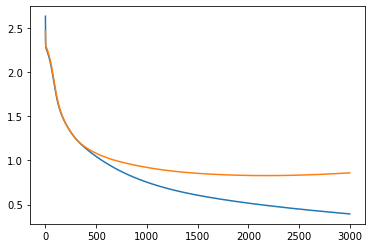

In [ ]:
plt.plot(np.arange(epochs),trainloss,testloss)

train accuracy:  87.125
test accuracy:  75.0


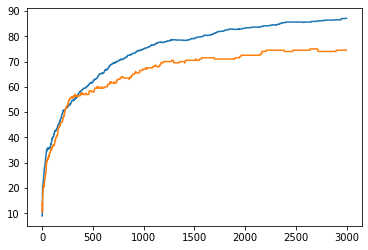

In [ ]:
plt.plot(np.arange(epochs),acc_train,acc_test)
print("train accuracy: ",max(acc_train))
print("test accuracy: ",max(acc_test))

# Synthesis
 

<BarContainer object of 5 artists>

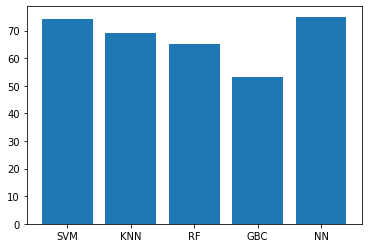

In [83]:
plt.bar(['SVM','KNN','RF','GBC','NN'],[74,69,65,53,75])

# BONUS
In this part i wanted to not extract features manualy, but by using a **CNN**.
To do this I used the dataset **GTZAN**. 

## LOAD THE DATASET GTZAN

In [ ]:
import torchaudio
dataset=torchaudio.datasets.GTZAN('.', download=True)


  0%|          | 0.00/1.14G [00:00<?, ?B/s]

In [ ]:
class MyDatasetGTZAN(Dataset):
	def __init__( self ,x,y): 
		self.x=x
		self.y=y
	def __getitem__( self ,index ):
		return self.x[index],self.y[index]
	def __len__(self):
		return len(self.x)

In [ ]:
data = list(dataset)
dataframe = pd.DataFrame(data=data)

In [ ]:
dataframe.describe

<bound method NDFrame.describe of                                                      0      1      2
0    [[tensor(0.0073), tensor(0.0166), tensor(0.007...  22050  blues
1    [[tensor(0.0034), tensor(0.0043), tensor(0.001...  22050  blues
2    [[tensor(0.0190), tensor(0.0477), tensor(0.029...  22050  blues
3    [[tensor(-0.0130), tensor(-0.0306), tensor(-0....  22050  blues
4    [[tensor(-0.0063), tensor(-0.0093), tensor(-0....  22050  blues
..                                                 ...    ...    ...
995  [[tensor(-0.0826), tensor(-0.1243), tensor(-0....  22050   rock
996  [[tensor(0.0727), tensor(0.1037), tensor(0.102...  22050   rock
997  [[tensor(-0.0341), tensor(-0.0384), tensor(0.0...  22050   rock
998  [[tensor(0.0859), tensor(0.1448), tensor(0.142...  22050   rock
999  [[tensor(-0.0211), tensor(-0.0345), tensor(-0....  22050   rock

[1000 rows x 3 columns]>

In [ ]:
SIZE_FEATURES=44100
X=dataframe.drop(columns=[2])
Y=dataframe[2]
Y=pd.factorize(Y)[0] 

x_short=np.array(X)
res=[]
for i in range (1000):
  res.append((x_short[i][0][0][:SIZE_FEATURES],x_short[i][1]))
X=res
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
y_train=torch.tensor(y_train.astype(np.long)).to(device)
y_test=torch.tensor(y_test.astype(np.long)).to(device)


##DATA LOADER

here I create a function to convert every audio file to **mel-spectogram**, this function is used with the parameter **collate_fn** of the data loader.

In [ ]:
N_FFT = 512
HOP_LENGTH = N_FFT // 2
N_MELS = 64 
def melSpec_collate_fn(samples):
  resData=torch.empty((len(samples),1,64, 173),dtype=torch.float32).to(device)
  resLabel=torch.empty((len(samples)),dtype=torch.long).to(device)
  resFinal=[]
  i=0
  for s in samples :
    y=np.array(s[0][0].tolist())
    sr=s[0][1]
    S = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = HOP_LENGTH, n_fft = N_FFT, n_mels = N_MELS)
    resData[i]=torch.tensor(S).to(device)
    resLabel[i]=s[1]
    i+=1
  resData=torch.tensor(resData).to(device)
    
  return resData,resLabel


   

In [ ]:
batch_size=20
trainloader = DataLoader(MyDatasetGTZAN(X_train,y_train) , collate_fn=melSpec_collate_fn,batch_size=batch_size)
testloader = DataLoader(MyDatasetGTZAN(X_test,y_test),  collate_fn=melSpec_collate_fn,batch_size=batch_size)


## THE NETWORK

my network is compsed of 3 **conv-layer(3X3)**, every layer is followed by a **relu activation** and a **maxPool**(2x2) or **maxPool**(2x1).A **batchNormalization **is used.
Then the output is passed to an** MLP** to classify the input.I used a **dropout** and **risiduel connection**.

In [ ]:
from torch import nn
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, (3, 3), stride=1, padding=0).to(device)
        self.pool1 = nn.MaxPool2d((2, 2), stride=1, padding=0).to(device)
        self.pool2 = nn.MaxPool2d((2, 1), stride=1, padding=0).to(device)
        self.fc1 = nn.Linear(9075, 828).to(device)
        self.fc2 = nn.Linear(828, 828).to(device)
        self.fc3 = nn.Linear(828, 10).to(device)
        self.sig=nn.Sigmoid()

    def forward(self, x):

        x=self.conv1(x)
        torch.nn.BatchNorm1d(31),
        x = self.pool1(F.relu(x))
        x=self.conv1(x)
        torch.nn.BatchNorm1d(31),
        x = self.pool1(F.relu(x))
        x=self.conv1(x)
        torch.nn.BatchNorm1d(31),
        x = self.pool2(F.relu(x))

        x = x.view(x.size()[0], -1)
       # print(x.shape)
        x =self.sig(self.fc1(x))
        x =x+self.sig(self.fc2(x))
        x =x+self.sig(self.fc2(x))
       
        torch.nn.Dropout(0.5),
        x = self.fc3(x)
        return x
      



*   to optimize the model i use **Adam** with a **learning rate of 1e-4 ** 
*   the loss used **is the cross Entropy Loss** 
*   the model is evaluated with **Accuracy ** and trainde for 100 epochs


*   unfortunately, I didn't have the time to optimize my network and go to the end of my idea (I wanted to use **TRANSFORMERS** after having extracted the features) and so I didn't have good results.




In [78]:
epochs=100
model = ConvNet()
learning_rate = 1e-3
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
#lr_sched = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.95)
criterion=torch.nn.CrossEntropyLoss()

In [79]:
trainloss=[]
testloss=[]
acc_test=[]
acc_train=[]
for epoch in range(epochs):
  tloss=0
  ok=0
  tot=0
  t = tqdm(iter(trainloader), total=len(trainloader))
  for inputs,labels in t :
    inputs, labels = inputs.to(device), labels.to(device)
    optim.zero_grad() 
    outputs =model(inputs)
    loss = criterion(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    tot += labels.size(0)
    ok += (predicted == labels).sum().item()
    tloss+=loss.item()
    loss.backward()
    optim.step()
 # lr_sched.step() 
  tloss=tloss/len(trainloader)
  trainloss.append(tloss)
  print("train loss for epoch: ",epoch ," is : ", tloss)
  print('Accuracy in train', (ok*100 / tot))
  acc_train.append((ok*100 / tot))
  tloss=0.0
  ok = 0 
  tot = 0
  with torch.no_grad():
      t = tqdm(iter(testloader), total=len(testloader))
      for inputs, labels in t:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        ok += (predicted == labels).sum().item()
        tloss += loss.item()
      tloss=tloss/len(testloader)
      testloss.append(tloss)
      print("test loss for epoch: ",epoch ," is : ", tloss)
      print('Accuracy in test', (ok*100 / tot))
      acc_test.append((ok*100 / tot))

  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
